In [2]:
import torch
from torch import nn
from PIL import Image
import numpy as np

In [3]:
# Load in the image
im = np.array(Image.open("brianna.png"))

In [4]:
# Make float between 0 and 1
im = torch.tensor(im, dtype=torch.float).permute(2, 0, 1).unsqueeze(0)/255

In [5]:
im.shape

torch.Size([1, 4, 128, 128])

In [7]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.model = nn.Sequential(
            nn.ConvTranspose2d(4, 4, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 4, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(4, 4, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(4, 8, 3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(8, 8, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, 3, padding=1),
            nn.Sigmoid(),
            nn.Upsample(scale_factor=2),
            nn.ConvTranspose2d(16, 16, 3, padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 4, 3, padding=1),
            nn.Sigmoid(),
        )
        
        self.start = nn.Parameter(torch.rand((1, 4, 16, 16)))
        
    def forward(self):
        return self.model(self.start)

In [73]:
# shp = E(im.cuda()).shape

In [9]:
im = im.cuda()

In [10]:
epochs = 500000
epoch = 0
device = torch.device("cuda:0")




loss_funct = torch.nn.MSELoss()


# Encoder, Decoder models
# E = Encoder().to(device)
D = Decoder().to(device)

# optim_E = torch.optim.AdamW(E.parameters(), lr=0.001)
optim_D = torch.optim.AdamW(D.parameters(), lr=0.001)

In [108]:
for epoch in range(epoch, epochs):
    # Send data through model
    # out = D(E(im.clone().to(device)))
    out = D()
    
    # MSE
    loss = loss_funct(out, im.clone())
    
    loss.backward()
    # optim_E.step()
    optim_D.step()
    # optim_E.zero_grad()
    optim_D.zero_grad()
    
    if epoch%100 == 0:
        print(epoch, loss.cpu().detach().item())

461200 0.0009529684903100133
461300 0.0009591851849108934
461400 0.0009884026367217302
461500 0.00104990741237998
461600 0.0009748937445692718
461700 0.0009620172786526382
461800 0.0009752800106070936
461900 0.0009723851690068841
462000 0.0009589454857632518
462100 0.0013651587069034576
462200 0.0009606968378648162
462300 0.0009543088963255286
462400 0.0010086401598528028
462500 0.0009717550710774958
462600 0.0009575230069458485
462700 0.00095034867990762
462800 0.0009521692409180105
462900 0.0009788363240659237
463000 0.001122612738981843
463100 0.000964422186370939
463200 0.0009832835057750344
463300 0.0010364039335399866
463400 0.001016324618831277
463500 0.000978758791461587
463600 0.0010734087554737926
463700 0.0009786091977730393
463800 0.001022506970912218
463900 0.0010033572325482965
464000 0.0010448598768562078
464100 0.0010173750342801213
464200 0.0011208117939531803
464300 0.0009903751779347658
464400 0.0009496932034380734
464500 0.0009511712123639882
464600 0.00098058092407

KeyboardInterrupt: 

In [109]:
sum([np.prod(p.size()) for p in D.parameters()])

6416

In [11]:
torch.save(D.state_dict(), "model.pt")

In [13]:
D_ = Decoder().to(device)
D_.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

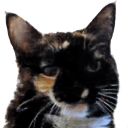

In [14]:
Image.fromarray((D_()*255).cpu().detach().squeeze().permute(1, 2, 0).to(torch.uint8).numpy())

In [16]:
D_.model[1](D_.model[0](D_.start))

tensor([[[[ 4.2444e-01, -1.3250e-01, -1.4658e-02,  ...,  1.2975e+00,
           -1.4649e-01, -7.1853e-02],
          [ 4.9112e-01,  3.4352e-01, -4.1287e-02,  ...,  9.6470e-02,
            3.2382e-01, -5.0941e-01],
          [-1.1013e-02,  1.0914e+00,  1.5489e+00,  ...,  1.1690e+00,
           -1.3404e-02, -1.4525e-03],
          ...,
          [ 2.0302e+00,  1.9791e+00,  5.2305e+00,  ...,  1.6461e+00,
            1.3868e+00, -1.2872e+00],
          [ 1.4453e+00,  3.2847e+00,  1.4757e+00,  ...,  2.3948e+00,
           -1.6891e+00, -1.2704e-02],
          [ 4.2273e-01,  1.8943e+00,  7.3298e-01,  ...,  3.3514e-01,
           -8.4484e-01, -1.4007e+00]],

         [[ 2.5265e+00,  5.0523e+00,  6.4140e+00,  ...,  5.9877e+00,
            1.3249e+00,  2.9959e+00],
          [ 1.5882e+00,  4.9867e+00,  6.3065e+00,  ...,  3.7209e+00,
            4.3034e+00,  2.3415e-01],
          [-2.1138e-03,  4.7703e+00,  2.9176e+00,  ..., -4.1858e-01,
            4.4941e+00,  2.3986e+00],
          ...,
     

In [15]:
Image.fromarray((D()*255).cpu().detach().squeeze().permute(1, 2, 0).to(torch.uint8).numpy()).save("output.png")

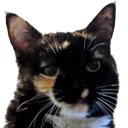

In [114]:
Image.fromarray((im.cuda()*255).cpu().detach().squeeze().permute(1, 2, 0).to(torch.uint8).numpy())